# COMP3221 - Week 8 - Consensus

In [ ]:
!git clone https://github.com/longtanle/distributed_systems_tutorials
%cd distributed_systems_tutorials/w8

The goal of this project is to implement a synchronous crash-fault tolerant consensus algorithm in Python for processes to agree on a unique value.

## 1. Crash Fault Tolerant Consensus

Implement the synchronous consensus protocol seen in the lecture that tolerates up to f crash failures. Run it with n = 4 nodes.

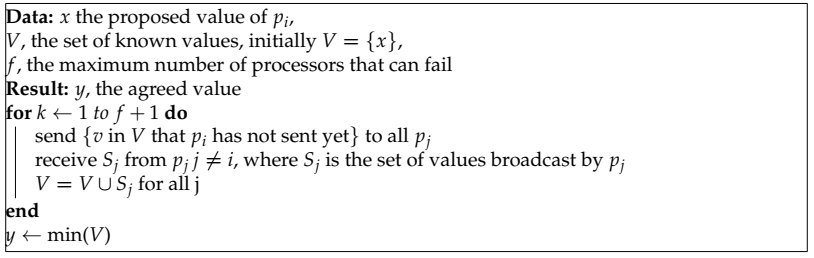

#### **Question**: How can we detect that we can decide on a value?

<font color="blue"> The pseudocode outlines a process in which each node proposes a value and then, over a series of rounds, nodes send the values they know about to all other nodes. They update their knowledge of proposed values based on the received values from other nodes. </font>

<font color="blue"> Consensus can be decided when all non-faulty nodes have received the same set of values from all other non-faulty nodes. </font>

<font color="blue"> In the given algorithm, **the decision is made after f + 1 rounds**, which ensures that even if f nodes crash, every non-faulty node has still received the proposed values from all other non-faulty nodes. </font>

### Task
Use the skeleton code in the supplied `process.py` file to implement a **broadcast** function.

In [ ]:
class Process():
	def __init__(self, x):
		self.v = set([x])

	def values(self):
		return self.v

	def broadcast(self, ps: list['Process'], f: int):
		# 1. ensure that the list of processes does not contain self (using assert statement)
		# 2. ensure f is valid with regard to the length of the list of the processes (using assert statement)
		# 3. execute the broadcast loop
		# 4. return the value agreed upon, or None if it is not possible
		pass


## 2. Testing

Take a look at the supplied test_process.py file. It has the following structure.

1. A `NodeTest` class is defined, containing test cases for the `Process` class, which implements the consensus.
2. There are five test cases, both for testing the behavior in good and crash cases, as well as passing incorrect parameters to the functions.
3. There is a helper function `execute` to run consensus broadcast on a list of nodes.

In turn, each unit test has Arrange, Act, Assert (AAA) structure.
1. In arrange step, you define the system under test, which are Process class instances in our case.
2. Act section includes calling the functions of the system.
3. In assert step, you verify that the system transitioned to the required state, or returned the expected value.
To simulate a network failure, we use a mock object approach to specify the required return values for the function calls.
For the detailed description of unit testing in Python, please refer to https://docs.python.org/3/library/unittest.html

### Task

Run the test file against your `Process` implementation by running the following command.

In [ ]:
!python3 -m unittest -v ./test_process.py

test_fault (test_process.NodeTest) ... ok
test_invalid_f (test_process.NodeTest) ... ok
test_invalid_list (test_process.NodeTest) ... ok
test_solo (test_process.NodeTest) ... ok
test_two (test_process.NodeTest) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.000s

OK


#### **Question**: What does ok mean for each test above?

<font color="blue"> The test assertions pass. For solo, two, and fault tests, all nodes agree on value 1. For invalid values, the test check that an assertion is raised </font>

#### **Question**: Which test uses a mock object?

<font color="blue"> Fault test. Value is returned once, and None is returned in the next function calls. </font>